In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
df_train = pd.read_csv(r'C:\Users\Varshith\OneDrive\Documents\codsoft\credit card fraud\fraudTrain.csv')
df_test = pd.read_csv(r"C:\Users\Varshith\OneDrive\Documents\codsoft\credit card fraud\fraudTest.csv")

In [3]:
df_train.shape

(1296675, 23)

In [4]:
df_test.shape

(555719, 23)

In [5]:
df = pd.concat([df_train,df_test])
df.shape

(1852394, 23)

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<Axes: xlabel='is_fraud'>

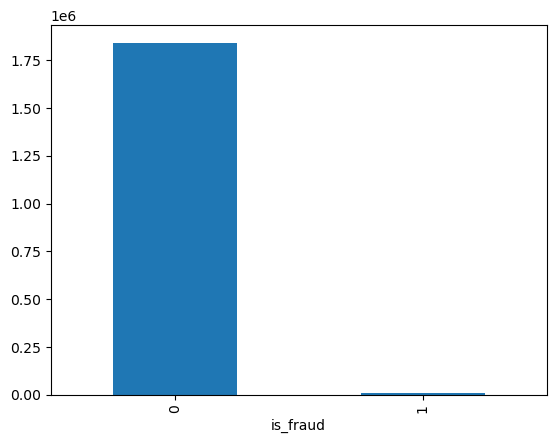

In [7]:
#preprocessing the data
df.groupby("is_fraud").count()["cc_num"].plot(kind="bar")

In [8]:
#There can be a overfitting issue since the data is not balanced properly it may lead to poor model performance
#we have to make it balanced
fraud = df[df["is_fraud"]==1]
is_not_fraud = df[df["is_fraud"]==0]
print(fraud.shape[0])
print(is_not_fraud.shape[0])
#we can clearly see the imbalance

9651
1842743


In [9]:
is_not_fraud = is_not_fraud.sample(fraud.shape[0],random_state = 42)
df_new = pd.concat([fraud,is_not_fraud])

<Axes: xlabel='is_fraud'>

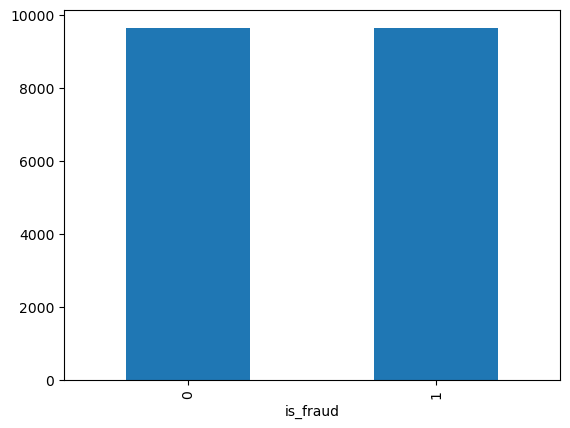

In [10]:
df_new.groupby("is_fraud").count()["cc_num"].plot(kind="bar")
#now the data is balanced

In [11]:
#let us check the structure of dataset
df_new.info()
#there are many unwnated columns that are not helpful for a model to detect
#the object dtype are basically the unwanted since they are useless in regression or other mathematical detection

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19302 entries, 2449 to 135673
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19302 non-null  int64  
 1   trans_date_trans_time  19302 non-null  object 
 2   cc_num                 19302 non-null  int64  
 3   merchant               19302 non-null  object 
 4   category               19302 non-null  object 
 5   amt                    19302 non-null  float64
 6   first                  19302 non-null  object 
 7   last                   19302 non-null  object 
 8   gender                 19302 non-null  object 
 9   street                 19302 non-null  object 
 10  city                   19302 non-null  object 
 11  state                  19302 non-null  object 
 12  zip                    19302 non-null  int64  
 13  lat                    19302 non-null  float64
 14  long                   19302 non-null  float64
 15

In [12]:
#let us eliminate the unwanted columns
unwanted_cols = ['Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time']
df_new.drop(columns = unwanted_cols,inplace = True)

In [13]:
#checking is there any null values in the dataset so that we can continue the process 
df_new.isnull().sum().sum()

0

In [14]:
#checking if there are any duplicate values or rows present in the dataset
df_new.duplicated().sum()

2

In [15]:
#elminating the duplicate values from the dataset
df_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,1997-06-04,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,1962-06-04,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,1981-05-06,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,1996-04-10,0


In [16]:
#lets us check the structure of the dataframe after performing the data preprocessing
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19302 entries, 2449 to 135673
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  19302 non-null  object 
 1   amt       19302 non-null  float64
 2   city      19302 non-null  object 
 3   state     19302 non-null  object 
 4   lat       19302 non-null  float64
 5   long      19302 non-null  float64
 6   city_pop  19302 non-null  int64  
 7   dob       19302 non-null  object 
 8   is_fraud  19302 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.5+ MB


In [17]:
#let us perform feature engineering
#to improve the performance of the model we will create new features based on the old ones
df_new["dob"] = pd.to_datetime(df_new["dob"])

In [18]:
from datetime import datetime
df_new["dob"] = df_new["dob"].dt.year
df_new['dob'] = datetime.now().year - df_new['dob']
df_new = df_new.rename(columns = {"dob" : "age"})
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,27,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,62,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,43,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,28,0


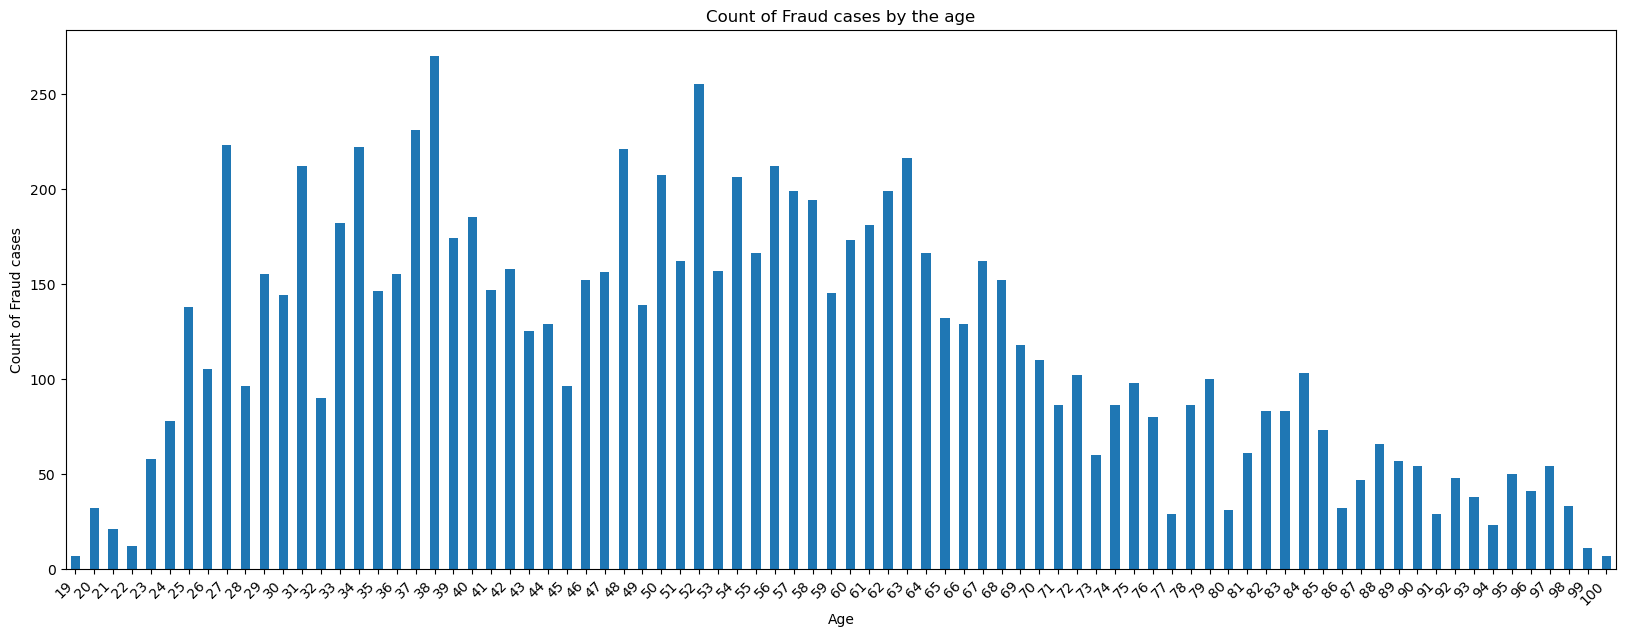

In [19]:
#now we have to understand which age group are maximum involved in the fraud
#let us make a visualization
plt.figure(figsize = (20,7))
axis = df_new[df_new["is_fraud"] == 1].groupby('age').count()['is_fraud'].plot(kind="bar")
axis.set_xlabel("Age")
axis.set_ylabel("Count of Fraud cases")
axis.set_title("Count of Fraud cases by the age")
plt.xticks(rotation=45,ha='right')
plt.show()

In [20]:
#let us segeregate the numerical and categorical columns
numerical_cols = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype == 'int32' or df_new[i].dtype == 'float64']
categorical_cols = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [21]:
print(numerical_cols)
print(categorical_cols)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [22]:
#let us encode the categorical values
from sklearn.preprocessing import LabelEncoder,StandardScaler
en = LabelEncoder()
for col in categorical_cols:
    df_new[col] = en.fit_transform(df_new[col])
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,4,281.06,165,27,35.9946,-81.7266,885,36,1
2472,2,11.52,733,43,29.4400,-98.4590,1595797,64,1
2523,4,276.31,733,43,29.4400,-98.4590,1595797,64,1
2546,2,7.03,165,27,35.9946,-81.7266,885,36,1
2553,4,275.73,733,43,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
99709,2,62.58,392,40,32.8357,-79.8217,20478,27,0
274694,8,273.25,61,34,42.3200,-78.0943,1766,62,0
807093,9,2.74,305,48,42.9373,-87.9943,13973,43,0
861157,11,161.28,880,17,38.4921,-85.4524,564,28,0


In [28]:
X = df_new.drop(['is_fraud'],axis=1)
Y = df_new['is_fraud']
columns = df_new.columns.tolist()
columns.remove('is_fraud')
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,-0.709574,-0.048824,-1.077481,0.034310,-0.510595,0.611576,-0.291727,-0.891598,1
2472,-1.225613,-0.766329,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
2523,-0.709574,-0.061468,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
2546,-1.225613,-0.778281,-1.077481,0.034310,-0.510595,0.611576,-0.291727,-0.891598,1
2553,-0.709574,-0.063012,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
...,...,...,...,...,...,...,...,...,...
99709,-1.225613,-0.630409,-0.213387,0.943047,-1.126791,0.746758,-0.226818,-1.390633,0
274694,0.322505,-0.069614,-1.473365,0.523630,0.723280,0.869343,-0.288808,0.550060,0
807093,0.580524,-0.789701,-0.544559,1.502270,0.843695,0.166787,-0.248368,-0.503459,0
861157,1.096564,-0.367673,1.644225,-0.664718,-0.023416,0.347174,-0.292790,-1.335184,0


In [32]:
#spliting train and test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print("x_train.shape :",x_train.shape)
print("x_test.shape :",x_test.shape)
print("y_train.shape :",y_train.shape)
print("y_test.shape :",y_test.shape)

x_train.shape : (15441, 8)
x_test.shape : (3861, 8)
y_train.shape : (15441,)
y_test.shape : (3861,)


In [34]:
#using randomforest algorithm for detection since it is very effective and suitable when compared to other models
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
#as our model has successfully trained let us check the metrics of the models
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of the model is: {accuracy*100:.2f}%")

Accuracy of the model is: 95.42%


In [41]:
#As Accuracy of the model is high let us also provide other metrics like confusion matrix,classification_report
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion_matrix: ")
print(confusion_mat)
print("\nClassification report: ")
print(classification_report(y_test,y_pred))

Confusion_matrix: 
[[1863   69]
 [ 108 1821]]

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1932
           1       0.96      0.94      0.95      1929

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861



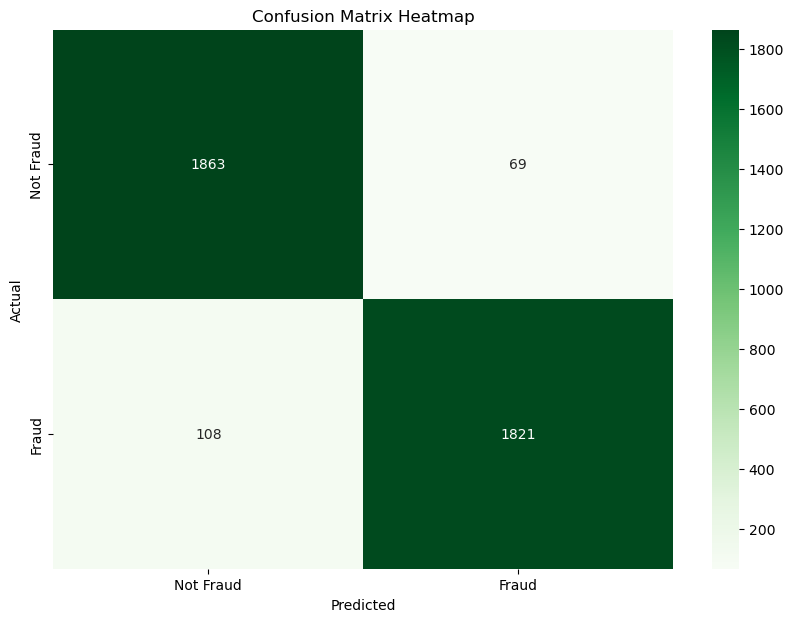

In [43]:
#let us visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,fmt='d',cmap="Greens",xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()